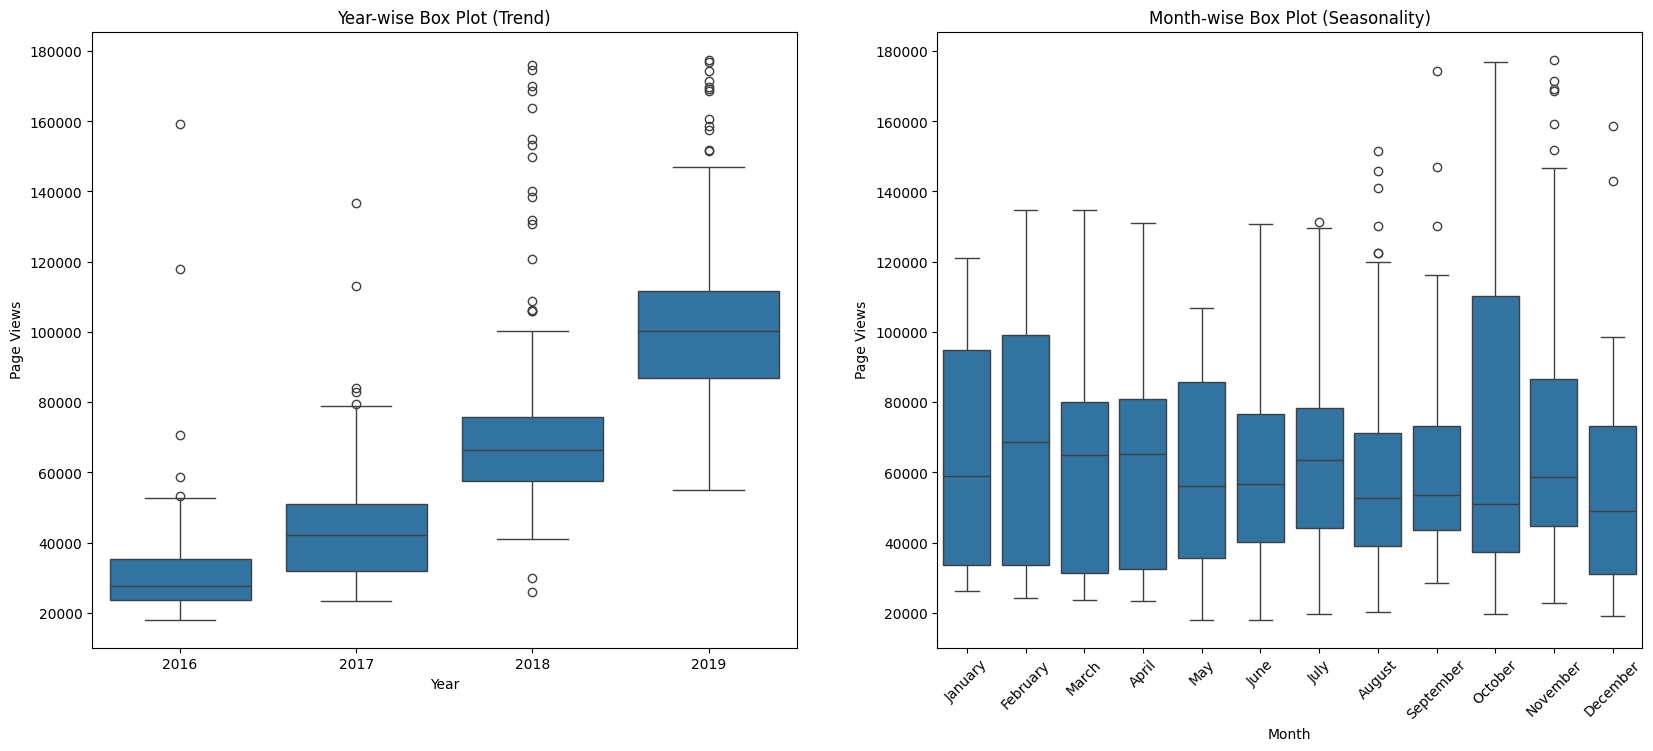

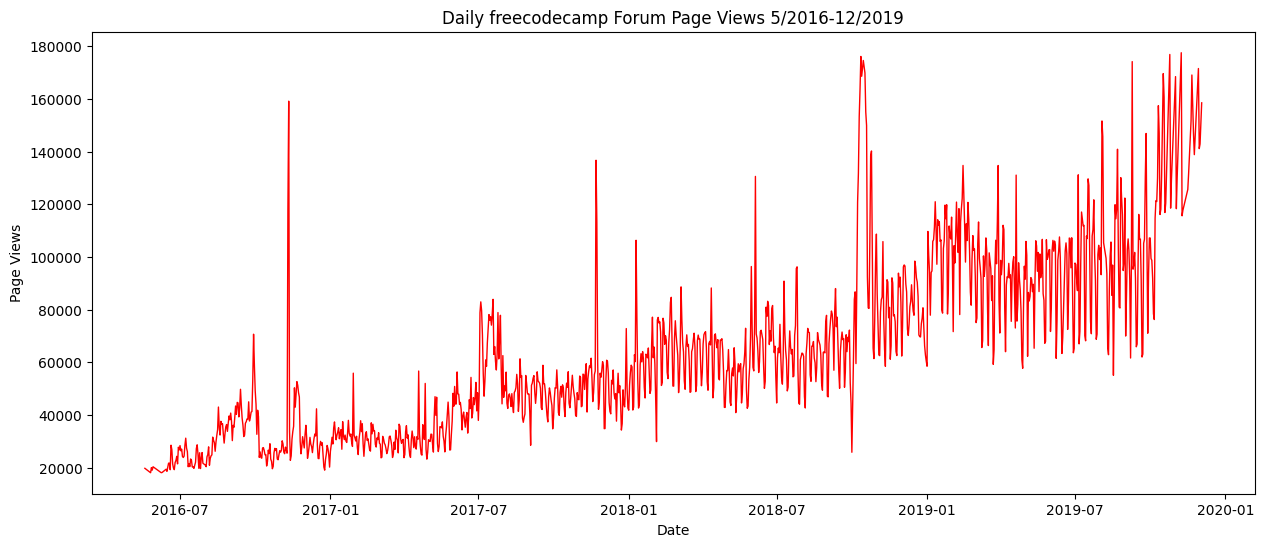

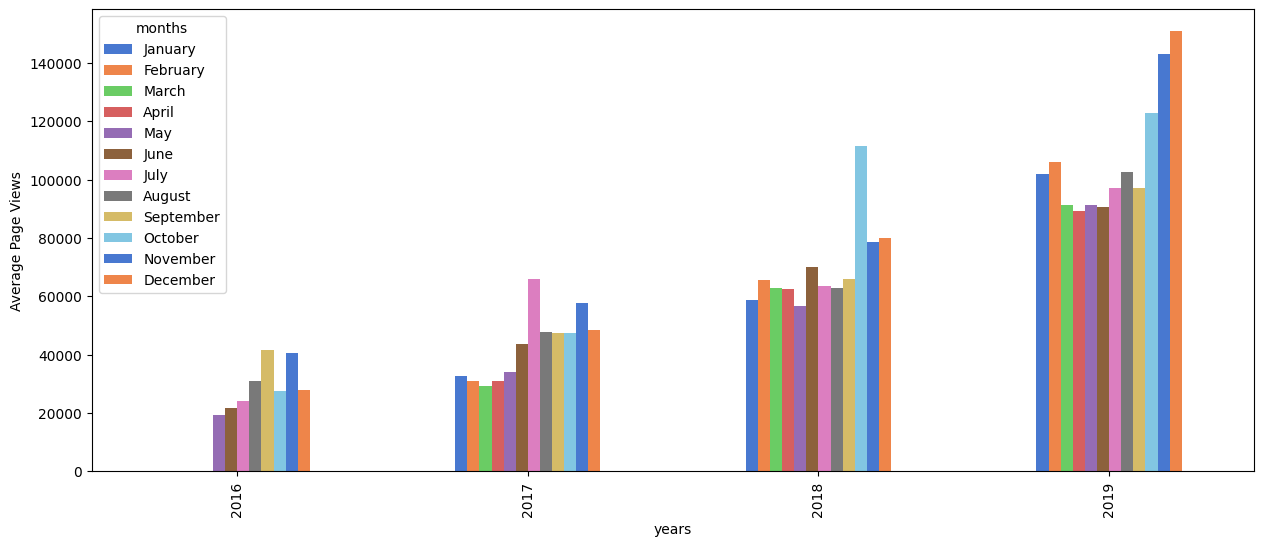

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    df=pd.read_csv(file_path,parse_dates=['date'],index_col='date')
    lower_bound=df['value'].quantile(0.025)
    upper_bound=df['value'].quantile(0.975)
    df=df[(df['value']>=lower_bound)&(df['value']<=upper_bound)]
    return df

def draw_line_plot(df):
    plt.figure(figsize=(15,6))
    plt.plot(df.index,df['value'],color='r',linewidth=1)
    plt.title('Daily freecodecamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    return plt.gcf()

def draw_bar_plot(df):
    df['year']=df.index.year
    df['month']=df.index.month
    df_bar=df.groupby(['year','month'])['value'].mean().unstack()
    colors =sns.color_palette("muted",n_colors=12)
    ax=df_bar.plot(kind='bar',figsize=(15,6),legend=True,color=colors)
    ax.set_xlabel('Years')
    ax.set_xlabel('years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('')
    months=['January','February','March','April','May','June','July','August',
    'September','October','November','December']
    ax.legend(months,title='months')
    return plt.gcf()

def draw_box_plot(df):
    df_box=df.copy()
    df_box['years']=df_box.index.month
    df_box['month_name']=df_box.index.month_name()
    month_order=['January','February','March','April','May','June','July','August',
    'September','October','November','December']
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month_name', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    axes[1].tick_params(axis='x', rotation=45)



    plt.close(fig)
    return fig

file_path="C:/Users/hp/Downloads/fcc-forum-pageviews.csv"
df=load_and_clean_data(file_path)

draw_line_plot(df)
draw_bar_plot(df)
draw_box_plot(df)